In [53]:
import numpy as np
import matplotlib.pyplot as plt
import torch
from torch import nn, optim
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
import torch.nn.functional as F


#import helper
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

# moves your model to train on your gpu if available else it uses your cpu
device = ("cuda" if torch.cuda.is_available() else "cpu")


In [54]:
device

'cpu'

In [56]:
transform = transforms.Compose([
                                transforms.Resize((32, 32)),
                                transforms.RandomRotation(degrees=15),  # Add random rotation
                                transforms.RandomHorizontalFlip(),
                                transforms.ToTensor(),
                                transforms.Normalize((0.1307,), (0.3081,))
                                ])


# Specify the dataset directory
data_dir = './DATA_MNIST/'

# Download and load the training data
train_set = datasets.MNIST(root=data_dir, download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(train_set, batch_size=64, shuffle=True)

# Download and load the test data
val_set = datasets.MNIST(root=data_dir, download=True, train=False, transform=transform)
valloader = torch.utils.data.DataLoader(val_set, batch_size=64, shuffle=True)

# Download and load the test data
test_set = datasets.MNIST(root=data_dir, download=True, train=False, transform=transform)
testloader = torch.utils.data.DataLoader(test_set, batch_size=64, shuffle=True)

#Length of datasets used for train, val and test
train_data_size = len(train_set)
val_data_size = len(val_set)
test_data_size = len(test_set)
print(train_data_size,val_data_size, test_data_size)

60000 10000 10000


In [57]:
training_data = enumerate(trainloader)
batch_idx, (images, labels) = next(training_data)
print(type(images))
print(images.shape)
print(labels.shape)

<class 'torch.Tensor'>
torch.Size([64, 1, 32, 32])
torch.Size([64])


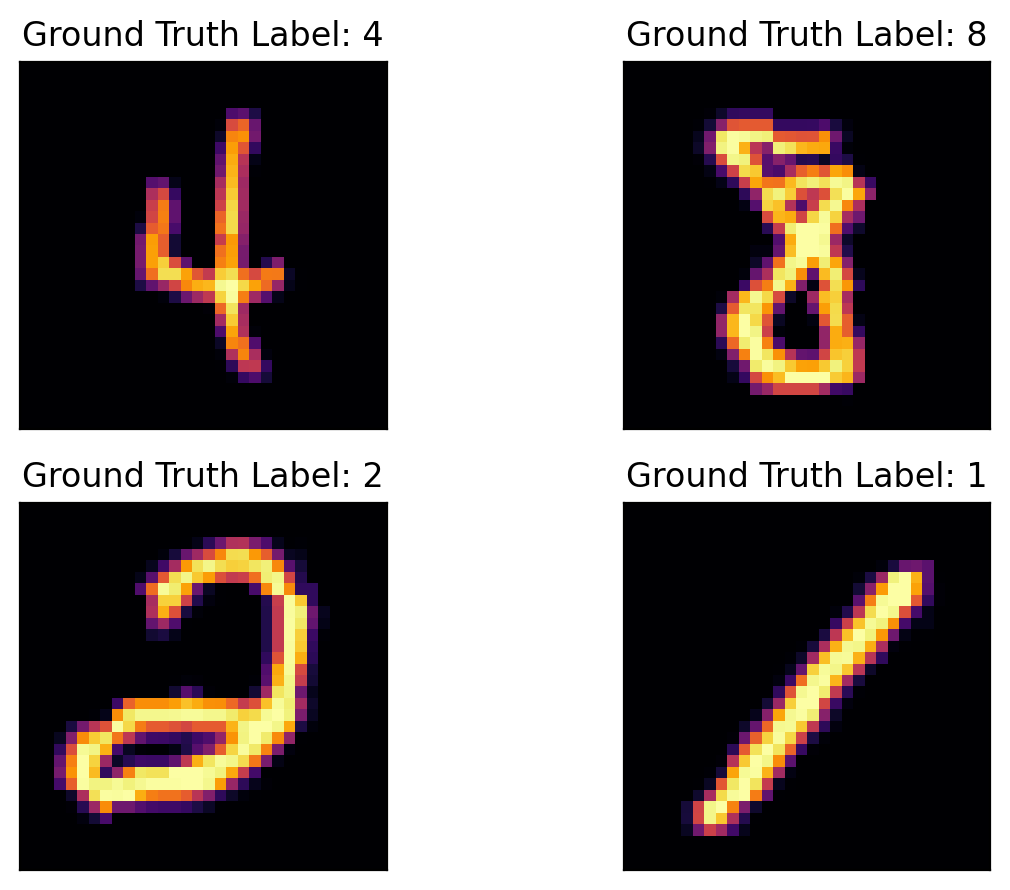

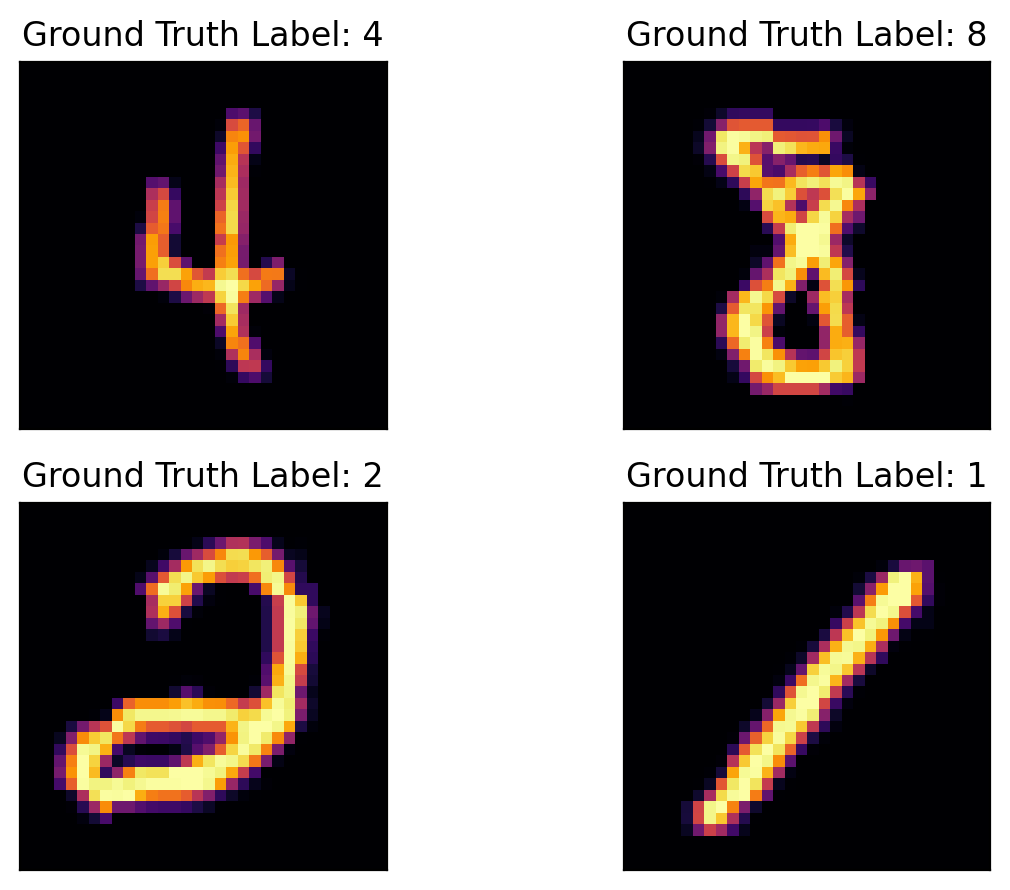

In [58]:
fig = plt.figure()
for i in range(4):
    plt.subplot(2,2,i+1)
    plt.tight_layout()
    plt.imshow(images[i][0], cmap='inferno')
    plt.title("Ground Truth Label: {}".format(labels[i]))
    plt.yticks([])
    plt.xticks([])
fig

In [59]:
# Defining the Model
class LeNet5(nn.Module):

    def __init__(self):
        super(LeNet5, self).__init__()
        self.fc1 = nn.Linear(32*32, 128)
        self.dropout = nn.Dropout(0.5)  # Drop 50% neurons
        self.fc2 = nn.Linear(128, 10)
        # Convolutional Neural Network Layer
        self.convolutaional_layers = nn.Sequential(
            nn.Conv2d(in_channels=1, out_channels=6, kernel_size=5, stride=1),
            nn.Tanh(),
            nn.AvgPool2d(kernel_size=2, stride=2, padding=0),
            nn.Conv2d(in_channels=6, out_channels=16, kernel_size=5, stride=1),
            nn.Tanh(),
            nn.AvgPool2d(kernel_size=2, stride=2, padding=0),
            nn.Conv2d(in_channels=16, out_channels=120, kernel_size=5, stride=1),
            nn.Tanh()
        )
        #Linear Layer
        self.linear_layers = nn.Sequential(
                nn.Linear(in_features=120, out_features=84),
                nn.Tanh(),
                nn.Linear(in_features=84, out_features=10)
        )

   # Defining the forward function
    def forward(self, x):
        # Pass the input to convolutional layers
        x = self.convolutaional_layers(x)
        # Flatten the output before feeding to linear layers
        x = x.view(x.size(0), -1)
        # Pass through linear layers
        x = self.linear_layers(x)
        # Apply softmax activation
        x = F.softmax(x, dim=1)
        return x

In [60]:
model = LeNet5().to(device)
print(model)

LeNet5(
  (fc1): Linear(in_features=1024, out_features=128, bias=True)
  (dropout): Dropout(p=0.5, inplace=False)
  (fc2): Linear(in_features=128, out_features=10, bias=True)
  (convolutaional_layers): Sequential(
    (0): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
    (1): Tanh()
    (2): AvgPool2d(kernel_size=2, stride=2, padding=0)
    (3): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
    (4): Tanh()
    (5): AvgPool2d(kernel_size=2, stride=2, padding=0)
    (6): Conv2d(16, 120, kernel_size=(5, 5), stride=(1, 1))
    (7): Tanh()
  )
  (linear_layers): Sequential(
    (0): Linear(in_features=120, out_features=84, bias=True)
    (1): Tanh()
    (2): Linear(in_features=84, out_features=10, bias=True)
  )
)


In [61]:
# Defining the Model
class LeNet5(nn.Module):

    def __init__(self):
        super(LeNet5, self).__init__()
        self.fc1 = nn.Linear(32*32, 128)
        self.dropout = nn.Dropout(0.5)
        self.fc2 = nn.Linear(128, 10)
        # Convolutional Neural Network Layer
        self.convolutaional_layers = nn.Sequential(
            nn.Conv2d(in_channels=1, out_channels=6, kernel_size=5, stride=1),
            nn.Tanh(),
            nn.AvgPool2d(kernel_size=2, stride=2, padding=0),
            nn.Conv2d(in_channels=6, out_channels=16, kernel_size=5, stride=1),
            nn.Tanh(),
            nn.AvgPool2d(kernel_size=2, stride=2, padding=0),
            nn.Conv2d(in_channels=16, out_channels=120, kernel_size=5, stride=1),
            nn.Tanh()
        )
        #Linear Layer
        self.linear_layers = nn.Sequential(
                nn.Linear(in_features=120, out_features=84),
                nn.Tanh(),
                nn.Linear(in_features=84, out_features=10)
        )

   # Defining the forward function
    def forward(self, x):
        # Pass the input to convolutional layers
        x = self.convolutaional_layers(x)
        # Flatten the output before feeding to linear layers
        x = x.view(x.size(0), -1)
        # Pass through linear layers
        x = self.linear_layers(x)
        # Apply softmax activation
        x = F.softmax(x, dim=1)
        return x

In [62]:
# Defining the optimizer and the loss function
optimizer = optim.Adam(model.parameters(), lr=0.01, weight_decay=0.001)
criterion = nn.CrossEntropyLoss()

In [63]:
# Training loop
epochs = 10
train_losses, val_losses, accuracies = [], [], []

for epoch in range(epochs):
    model.train()
    total_train_loss = 0

    for batch_idx, (images, labels) in enumerate(trainloader):
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        total_train_loss += loss.item()

        loss.backward()
        optimizer.step()

    avg_train_loss = total_train_loss / len(trainloader)
    train_losses.append(avg_train_loss)

    # Validation
    model.eval()
    total_val_loss = 0
    correct_predictions = 0

    with torch.no_grad():
        for images, labels in valloader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            loss = criterion(outputs, labels)
            total_val_loss += loss.item()

            _, predicted_labels = torch.max(outputs, 1) # Get the predicted labels (indices)
            correct_predictions += (predicted_labels == labels).sum().item()

    avg_val_loss = total_val_loss / len(valloader)
    val_losses.append(avg_val_loss)
    accuracy = 100.0 * correct_predictions / len(val_set)
    accuracies.append(accuracy)

    print(f'Epoch [{epoch+1}/{epochs}] - '
          f'Train Loss: {avg_train_loss:.4f} - '
          f'Val Loss: {avg_val_loss:.4f} - '
          f'Accuracy: {accuracy:.2f}%')

Epoch [1/10] - Train Loss: 1.6708 - Val Loss: 1.6353 - Accuracy: 83.43%
Epoch [2/10] - Train Loss: 1.6107 - Val Loss: 1.5878 - Accuracy: 87.98%
Epoch [3/10] - Train Loss: 1.6012 - Val Loss: 1.5872 - Accuracy: 88.10%
Epoch [4/10] - Train Loss: 1.6008 - Val Loss: 1.6072 - Accuracy: 86.00%
Epoch [5/10] - Train Loss: 1.5974 - Val Loss: 1.6064 - Accuracy: 86.58%
Epoch [6/10] - Train Loss: 1.5938 - Val Loss: 1.5822 - Accuracy: 88.67%
Epoch [7/10] - Train Loss: 1.5933 - Val Loss: 1.5621 - Accuracy: 90.58%
Epoch [8/10] - Train Loss: 1.5882 - Val Loss: 1.5969 - Accuracy: 87.26%
Epoch [9/10] - Train Loss: 1.5889 - Val Loss: 1.5846 - Accuracy: 88.15%
Epoch [10/10] - Train Loss: 1.5884 - Val Loss: 1.5770 - Accuracy: 89.14%


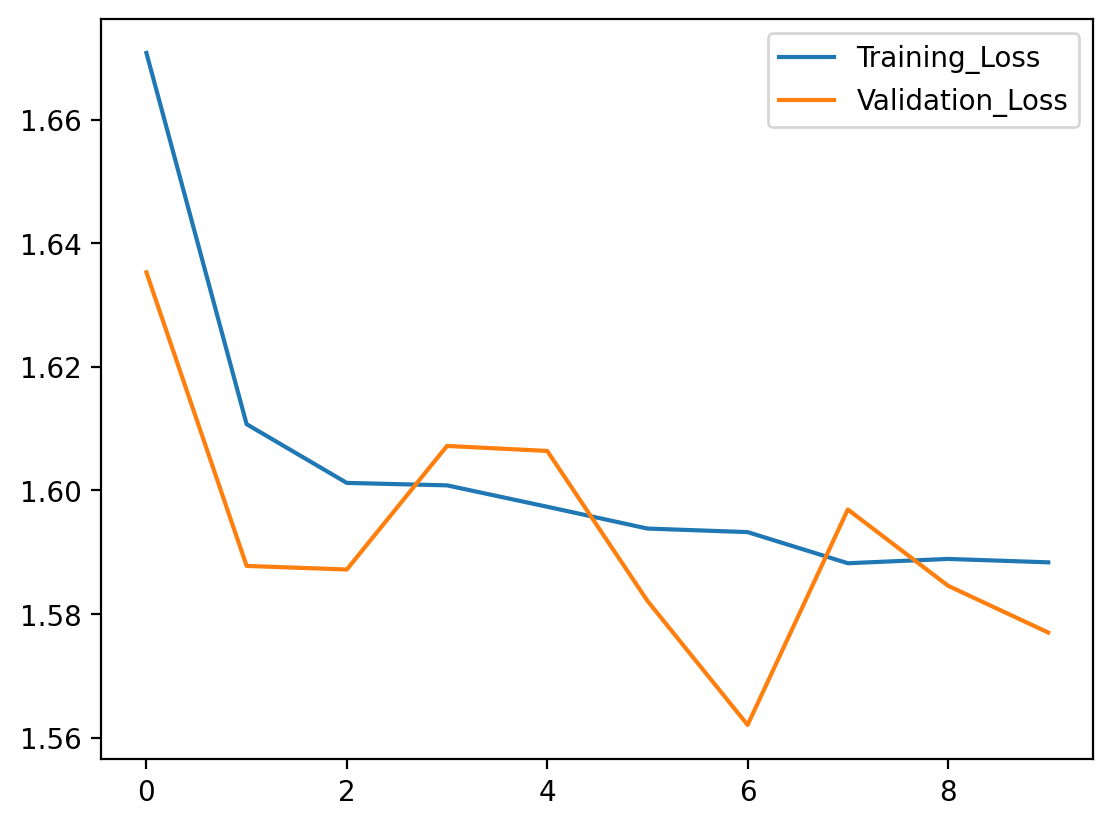

In [64]:
plt.plot(train_losses)
plt.plot(val_losses)
plt.legend(["Training_Loss","Validation_Loss"])

In [65]:
dataiter = iter(testloader)
images, labels = next(dataiter)
images, labels = images.to(device), labels.to(device)

In [66]:
with torch.no_grad():
  images, labels = images.to(device), labels.to(device)
  pred= model(images)

In [67]:
for i in images:
  i = i.mean(dim=0).cpu().numpy()

In [68]:
class_names = ['T-shirt/top','Trouser','pullover','Dress','Coat',
               'Sandal','Shirt','Sneaker','Bag','Ankle boot']

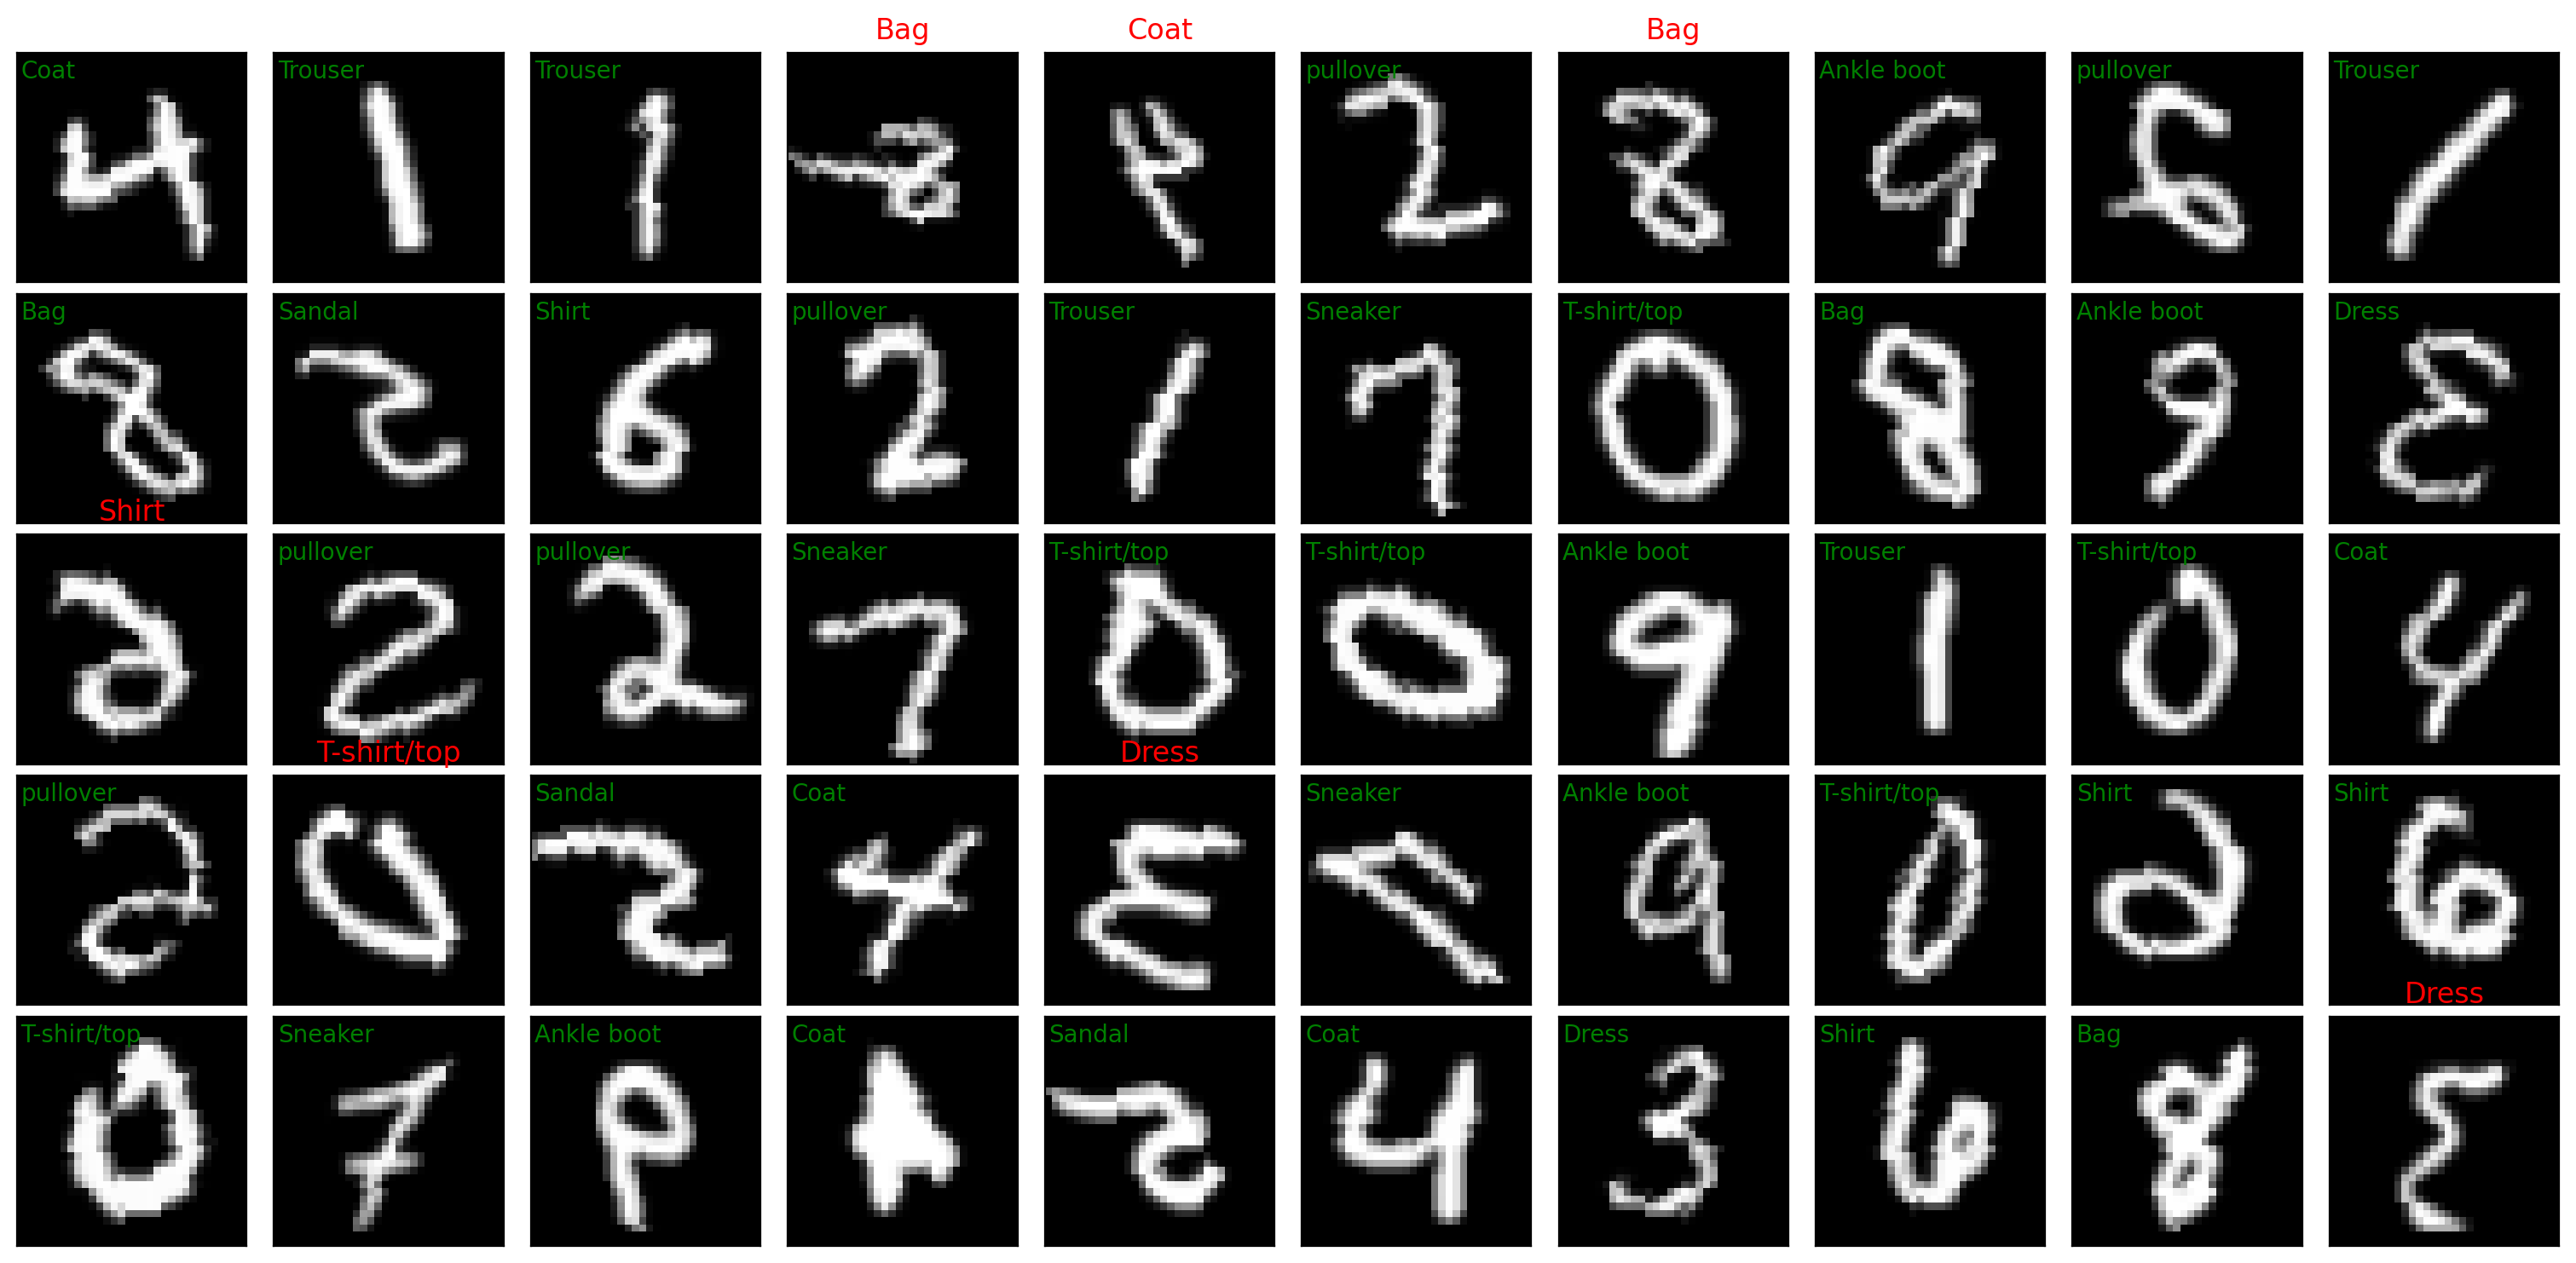

In [69]:
fig = plt.figure(figsize=(15, 7))
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

for i in range(50):
    ax = fig.add_subplot(5, 10, i + 1, xticks=[], yticks=[])
    ax.imshow(images[i].cpu().numpy().squeeze(), cmap='gray')

    if labels[i] == torch.max(pred[i], dim=0)[1]:
        ax.text(0,3,class_names[labels[i]], color='green')
    else:
        ax.set_title(class_names[labels[i]], color='red')